# HR Analytics Project- Understanding the Attrition in HR

# Libraries Importing

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Importing

In [6]:
df=pd.read_csv(r"C:\Users\Vicky\Downloads\ibm-hr-analytics-employee-attrition-performance (1)\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Importing data from given link with pd.read_csv method.

# Exploratory Data Analysis

In [7]:
#checking shape of data.
df.shape

(1470, 35)

In [8]:
#checking total numbers of columns we have.
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Here we try to find Data Type, as we are getting there are mix data i.e, int,float,object(str).

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Here we find total numbers of columns or rows with data types as well as null values and No null value present in our data.

In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No Null Values present.

In [12]:
pd.concat({'unique values': df.apply(pd.unique), 'number of unique values': df.nunique()}, axis=1)

,unique values,number of unique values
Age,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...",43
Attrition,"[Yes, No]",2
BusinessTravel,"[Travel_Rarely, Travel_Frequently, Non-Travel]",3
DailyRate,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...",886
Department,"[Sales, Research & Development, Human Resources]",3
DistanceFromHome,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...",29
Education,"[2, 1, 4, 3, 5]",5
EducationField,"[Life Sciences, Other, Medical, Marketing, Tec...",6
EmployeeCount,[1],1
EmployeeNumber,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...",1470


Checking all features unique values.

# Statistic Summary

As we know the dataset we have is categorical data some of columns are categorical, so here we are trying to find unique values of all columns.

In [13]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The above Summary provide Statistical information about whole data i.e. Count, Mean, Standard Deviation, Minimum value, 25%, 50% 75% and Maximum Value and statistical report is mentioned above

# Data Visualization

<AxesSubplot:>

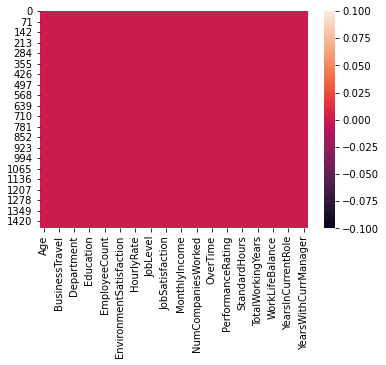

In [14]:
sns.heatmap(df.isnull())

NO Null Values present.

<AxesSubplot:>

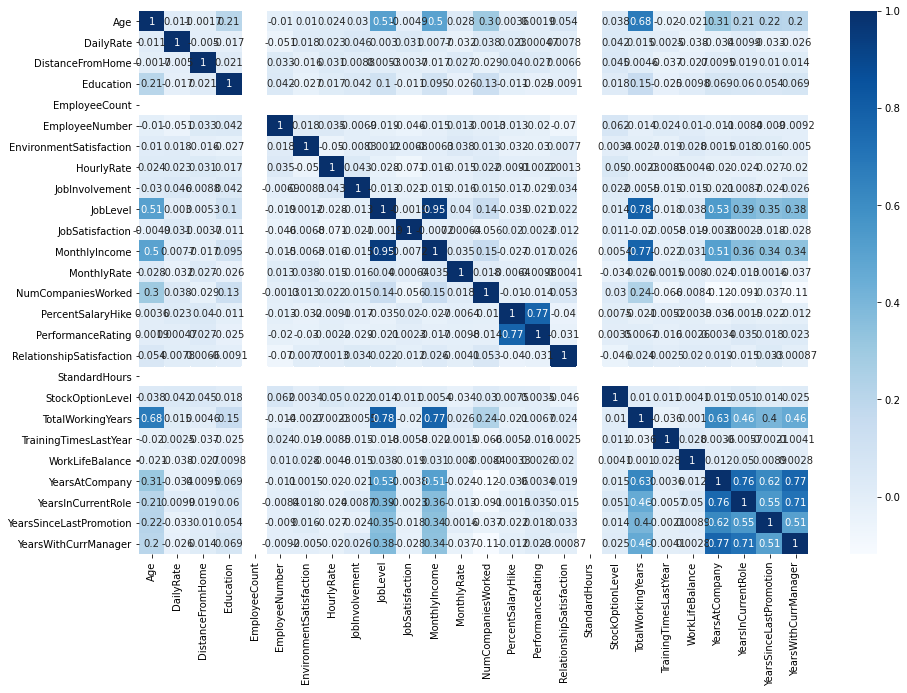

In [15]:
dfcor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(dfcor,cmap='Blues',annot=True)

As we are getting from above correlation graph. There are no good relationship bewteen features but fews columns have good relationship.One reason because it is categorical data.

# Univariate Analysis

<AxesSubplot:xlabel='Attrition', ylabel='count'>

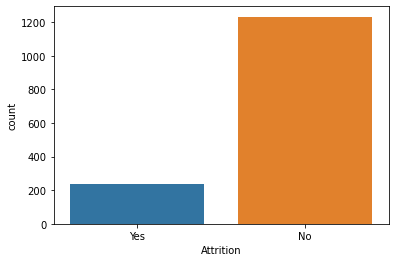

In [17]:
sns.countplot(x='Attrition',data=df)

Tareget variable is imblanced.

<AxesSubplot:xlabel='Age', ylabel='count'>

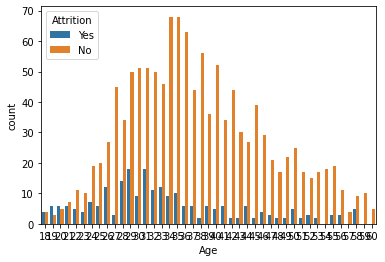

In [18]:
sns.countplot(x='Age',hue='Attrition',data=df)

As we are getting, Age has maximum "NO" attrition.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

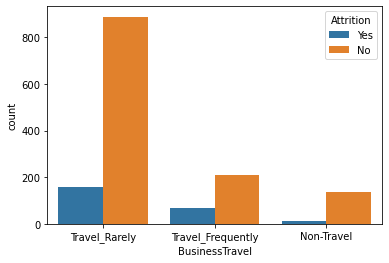

In [19]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)

In BusniessTravel the Travel_Rarely has few attriation

<AxesSubplot:xlabel='Department', ylabel='count'>

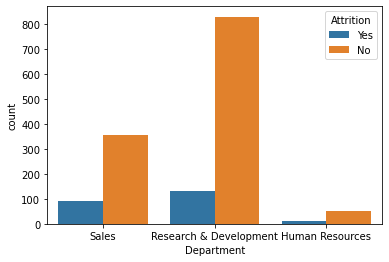

In [20]:
sns.countplot(x='Department',hue='Attrition',data=df)

In Department the maximum  attrition has in Research & Development but maximum numbers of counts NO.

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

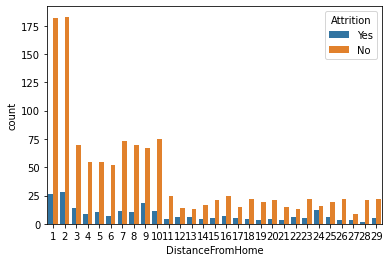

In [21]:
sns.countplot(x='DistanceFromHome',hue='Attrition',data=df)

In [ ]:
Attrition is more when the distance of office is more from home

<AxesSubplot:xlabel='Education', ylabel='count'>

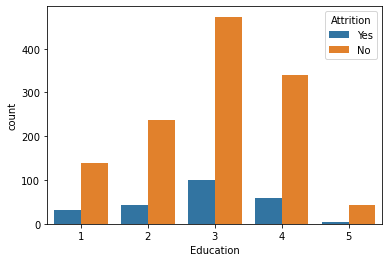

In [22]:
sns.countplot(x='Education',hue='Attrition',data=df)

As we are getting from Eduction, maximum attrition on 3 number but maximum number of counts are NO.

<AxesSubplot:xlabel='EducationField', ylabel='count'>

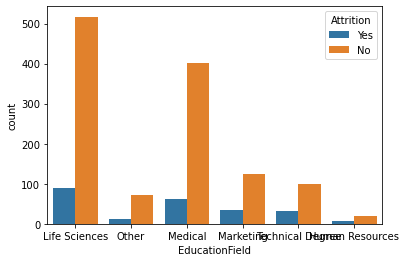

In [23]:
sns.countplot(x='EducationField',hue='Attrition',data=df)

In [ ]:
Attrition is high with employee's education in the field of Human Resources, Marketing and Technical Degree that other fields

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

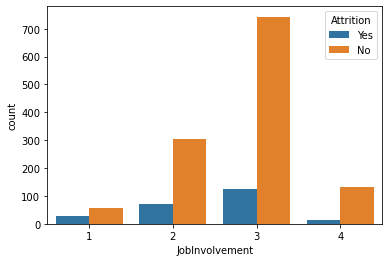

In [24]:
sns.countplot(x='JobInvolvement',hue='Attrition',data=df)

In JobInvolvement the maximum attrition has in 3 number rather than others.

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

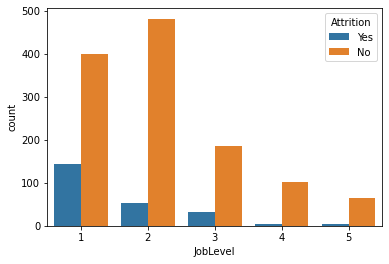

In [25]:
sns.countplot(x='JobLevel',hue='Attrition',data=df)

In Job level the maximum attrition has on 2 number.

<AxesSubplot:xlabel='JobRole', ylabel='count'>

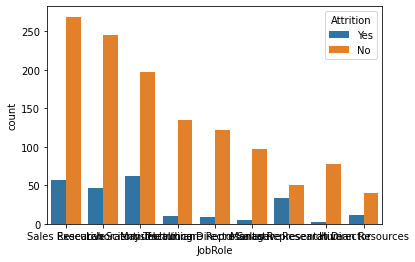

In [26]:
sns.countplot(x='JobRole',hue='Attrition',data=df)

there are also maximum counts NO.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

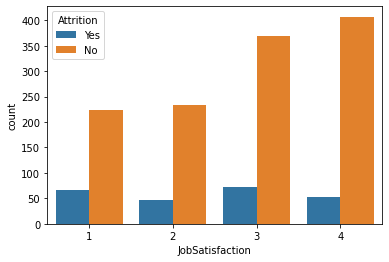

In [27]:
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df)

In Job Satisfaction the maximum attrition on 4 numbers.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

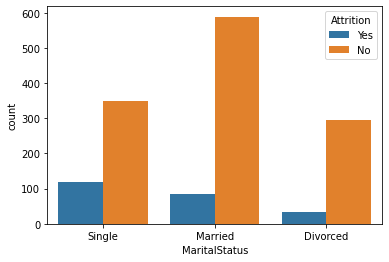

In [28]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)

In MritalStatus the divorced has high attrition rather than other 

<AxesSubplot:xlabel='OverTime', ylabel='count'>

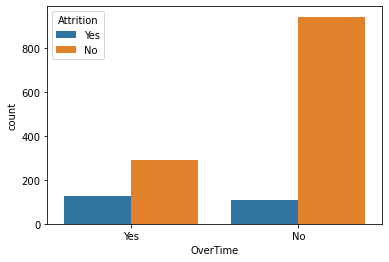

In [29]:
sns.countplot(x='OverTime',hue='Attrition',data=df)

Employees who work over time have high attrition than employees who did not do over time

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

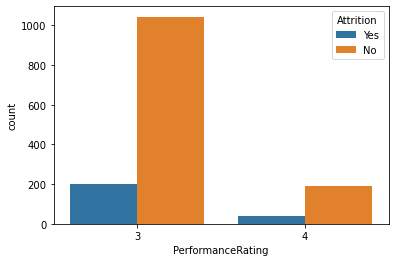

In [30]:
sns.countplot(x='PerformanceRating',hue='Attrition',data=df)

In Performance Rating 4 has high attition rather than 3.

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

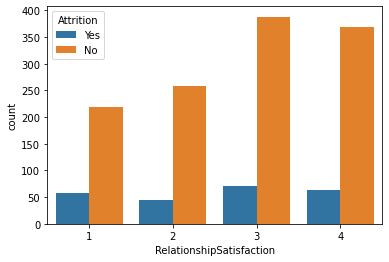

In [31]:
sns.countplot(x='RelationshipSatisfaction',hue='Attrition',data=df)

IN RelationshipSatisfaction number 1 & 2 have more attrition rather than 3 & 4

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

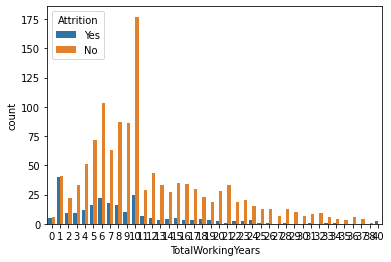

In [32]:
sns.countplot(x='TotalWorkingYears',hue='Attrition',data=df)

Employees who are working less than 2 years have more attrition

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

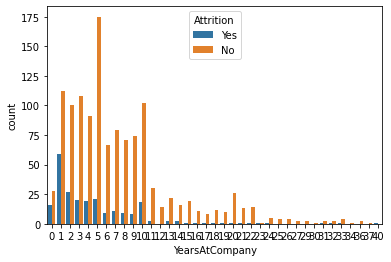

In [33]:
sns.countplot(x='YearsAtCompany',hue='Attrition',data=df)

Employee who are working maximum year have high attrition.

<AxesSubplot:xlabel='Age', ylabel='BusinessTravel'>

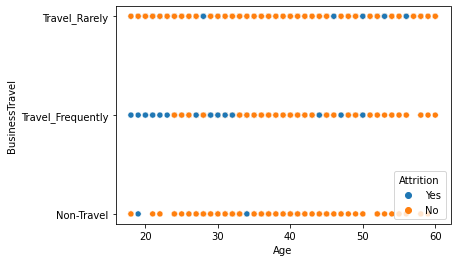

In [34]:
sns.scatterplot(data=df, x="Age", y="BusinessTravel", hue="Attrition")

<AxesSubplot:xlabel='Age', ylabel='DailyRate'>

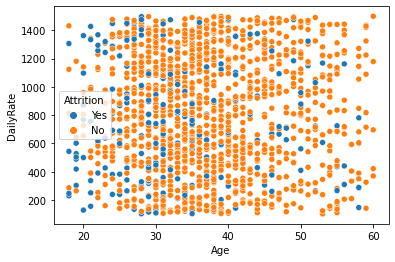

In [36]:
sns.scatterplot(data=df, x="Age", y="DailyRate", hue="Attrition")

In above scatterplot who employee below 22 in age have high attrition.

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyRate'>

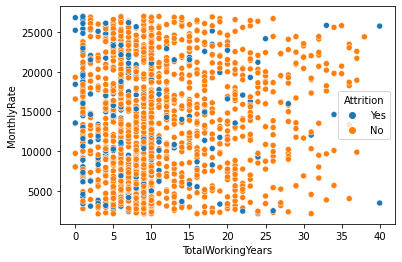

In [41]:
sns.scatterplot(data=df, x="TotalWorkingYears", y="MonthlyRate", hue="Attrition")

the employees working for maximum years have high attrition.

<AxesSubplot:xlabel='Age', ylabel='YearsAtCompany'>

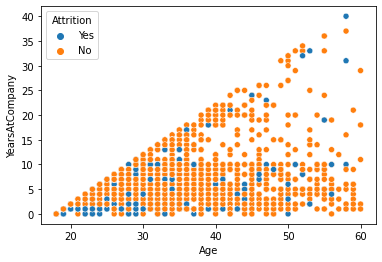

In [44]:
sns.scatterplot(data=df, x="Age", y="YearsAtCompany", hue="Attrition")

# Data Encoding

the employess who are younger or below 20 have high attrition

In [50]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Attrition'] = labelencoder.fit_transform(df['Attrition'])
df['BusinessTravel'] = labelencoder.fit_transform(df['BusinessTravel'])
df['Department'] = labelencoder.fit_transform(df['Department'])
df['EducationField'] = labelencoder.fit_transform(df['EducationField'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['JobRole'] = labelencoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelencoder.fit_transform(df['MaritalStatus'])
df['Over18'] = labelencoder.fit_transform(df['Over18'])
df['OverTime'] = labelencoder.fit_transform(df['OverTime'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


# Multivariate Analysis

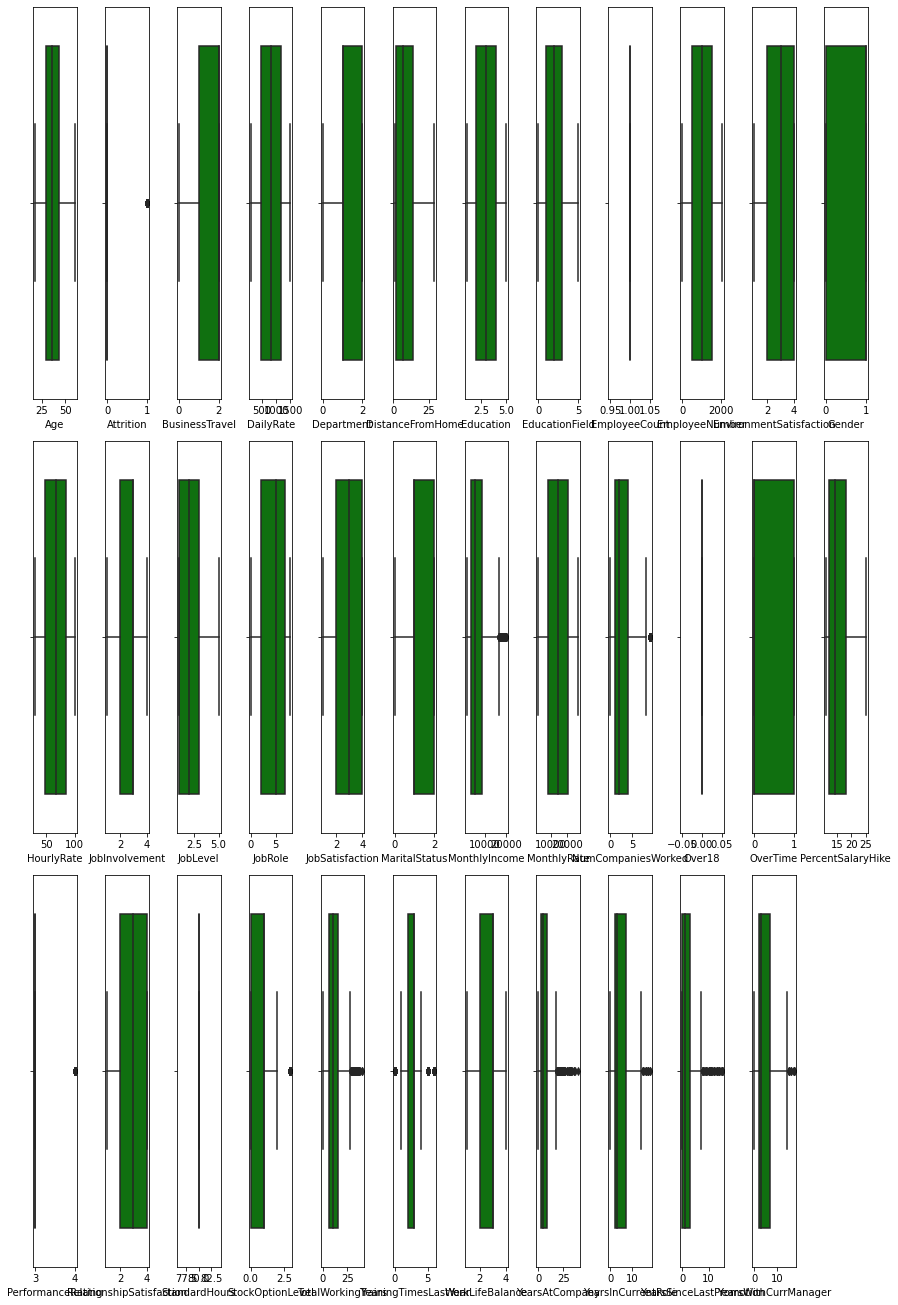

In [58]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green', orient='v')
    plt.tight_layout()

In [ ]:
sns.pairplot(data=df, hue="Attrition")

Zscore Value: NO need to apply Zscore functionality. As we know this is categorical data and maximum columns have identical valules which is not for Zscore functionality.

Remove Skewness: No need to remove skewness from categorical data. as we know in this data the maximum columns is categorical.

# Spliting the Dependent and Target Variables.

In [75]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [76]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2


# Data Scaling

In [77]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,0.0,-1.701283,-0.660531,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.0,-1.699621,0.254625,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,0.0,-1.696298,1.169781,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,0.0,-1.694636,1.169781,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,0.0,-1.691313,-1.575686,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.703764,-0.891688,0.565311,0.0,1.721670,0.254625,...,0.266233,0.0,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,0.590048,-0.469754,-0.493817,-0.393938,-1.868426,0.565311,0.0,1.723332,1.169781,...,-1.584178,0.0,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.640727,0.085049,-0.937414,0.0,1.726655,-0.660531,...,-0.658973,0.0,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,-0.913194,0.546677,1.401512,-0.887515,0.085049,0.565311,0.0,1.728317,1.169781,...,1.191438,0.0,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


# Using PCA

In [85]:
from sklearn.decomposition import PCA
testpca=PCA()
Y=testpca.fit(X)

In [86]:
Y.explained_variance_ratio_

array([1.51177651e-01, 6.11435427e-02, 5.81678833e-02, 5.46411393e-02,
       5.14678185e-02, 3.85327140e-02, 3.70378754e-02, 3.65788068e-02,
       3.59127970e-02, 3.43803864e-02, 3.33363341e-02, 3.24846769e-02,
       3.23245269e-02, 3.16035964e-02, 3.11119491e-02, 3.05559848e-02,
       3.02809958e-02, 2.86938854e-02, 2.84283408e-02, 2.74678392e-02,
       2.71386029e-02, 2.38869746e-02, 1.73600977e-02, 1.67327994e-02,
       1.05134138e-02, 1.02738807e-02, 8.99242561e-03, 7.24672067e-03,
       6.48512990e-03, 4.54757680e-03, 1.49363356e-03, 2.98145347e-32,
       7.75822632e-34, 7.75822632e-34])

In [87]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 15.11776514,  21.23211941,  27.04890774,  32.51302167,
        37.65980352,  41.51307492,  45.21686245,  48.87474313,
        52.46602283,  55.90406146,  59.23769488,  62.48616257,
        65.71861527,  68.87897491,  71.99016982,  75.0457683 ,
        78.07386789,  80.94325642,  83.78609051,  86.53287443,
        89.24673473,  91.63543218,  93.37144196,  95.04472189,
        96.09606328,  97.12345135,  98.02269391,  98.74736597,
        99.39587896,  99.85063664, 100.        , 100.        ,
       100.        , 100.        ])

In [88]:
FinalPCA=PCA(n_components=26)
FinalData=FinalPCA.fit_transform(x)

In [89]:
FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,5139.144002,-718.086191,-1047.618131,-246.007141,-29.136113,1.102347,-8.859410,-2.056755,-3.903634,-3.042448,...,1.750971,-1.993961,0.177429,0.680013,-1.146438,2.009666,-1.032897,1.216428,-0.130259,0.704484
1,10528.865129,-1802.653430,-1004.883381,565.245196,2.458596,12.782940,-2.587402,-0.036459,8.333766,-5.521280,...,-0.494940,1.617407,-0.446684,-0.635860,1.213338,1.645141,0.863703,0.148669,0.310486,-0.464868
2,-12089.425921,-3920.145490,-1048.000222,-488.847990,-25.899679,1.413627,-7.626811,-6.546913,-0.704677,2.265214,...,0.657943,-0.186504,-1.232723,0.728416,-1.234664,1.153730,0.650619,0.046312,-0.426628,-0.222161
3,8689.622047,-3949.517598,-1072.175400,-544.170543,9.364752,0.367456,-5.841633,4.627869,-4.249474,-0.734206,...,-0.487742,0.710989,-0.758403,0.172531,-0.962737,-1.294252,-0.033626,-0.186275,0.610359,0.537393
4,2192.360869,-3125.191133,-1012.117528,267.180275,24.634854,-7.528494,-5.877370,-1.019278,-3.540353,3.531730,...,-0.373503,0.178068,1.411177,-1.319034,1.353860,1.569200,-0.273278,-0.415655,-0.306830,-0.407542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-2181.024559,-3848.070666,1023.712248,-143.499755,26.296613,9.316218,12.645107,-1.124814,0.592095,9.018427,...,-0.037674,-0.810710,-1.090603,-0.704570,0.664212,0.576841,-0.813267,-0.969649,0.875500,-0.284746
1466,7281.771483,3191.212196,1044.998665,115.413126,24.497951,-4.114278,-3.080194,-1.207130,0.505125,-4.488769,...,-1.329535,1.132759,-0.173398,2.121516,0.044467,2.024262,0.492668,0.148439,-0.401066,-0.462524
1467,-9143.942850,9.825089,1087.283833,598.828898,-19.997605,-11.819731,-4.055396,0.575218,5.196366,0.694183,...,2.096317,0.232486,0.997097,0.391796,0.195027,-0.122409,-1.086791,-0.873373,-0.075796,-0.072450
1468,-1113.966963,-1070.216317,1023.786886,-282.395082,4.443784,14.364611,-9.443836,0.618717,-1.058051,-0.108544,...,0.405967,1.567721,-0.999767,-0.875451,-0.220899,0.122195,0.530261,1.184742,0.498163,-0.589891


# Data Imbalance

In [94]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [95]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(FinalData2,y)

In [97]:
x_over.shape

(2466, 26)

In [98]:
y_over.shape

(2466,)

In [101]:
y=pd.DataFrame(y_over)

In [102]:
X=x_over

# Spliting X and y into Train data and Test data for model building.

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=43)

In [106]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1652, 26) (1652, 1) (814, 26) (814, 1)


# Importing Algorithms

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression

In [126]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.687960687960688
[[216 184]
 [ 70 344]]
              precision    recall  f1-score   support

           0       0.76      0.54      0.63       400
           1       0.65      0.83      0.73       414

    accuracy                           0.69       814
   macro avg       0.70      0.69      0.68       814
weighted avg       0.70      0.69      0.68       814



# GaussianNB

In [129]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
predgnb=gnb.predict(X_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7223587223587223
[[259 141]
 [ 85 329]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       400
           1       0.70      0.79      0.74       414

    accuracy                           0.72       814
   macro avg       0.73      0.72      0.72       814
weighted avg       0.73      0.72      0.72       814



# Support Vector Classifier

In [118]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6216216216216216
[[268 132]
 [176 238]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.64       400
           1       0.64      0.57      0.61       414

    accuracy                           0.62       814
   macro avg       0.62      0.62      0.62       814
weighted avg       0.62      0.62      0.62       814



# Random Forest Classifier

In [111]:
Rf=RandomForestClassifier(n_estimators=100,random_state=42)
Rf.fit(X_train,y_train)
predrf=Rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9176904176904177
[[365  35]
 [ 32 382]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       400
           1       0.92      0.92      0.92       414

    accuracy                           0.92       814
   macro avg       0.92      0.92      0.92       814
weighted avg       0.92      0.92      0.92       814



# AdaBoost Calssifier

In [113]:
Ad=AdaBoostClassifier(n_estimators=100)
Ad.fit(X_train,y_train)
predad=Ad.predict(X_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.828009828009828
[[339  61]
 [ 79 335]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       400
           1       0.85      0.81      0.83       414

    accuracy                           0.83       814
   macro avg       0.83      0.83      0.83       814
weighted avg       0.83      0.83      0.83       814



# Decission Tree Classifier

In [123]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7813267813267813
[[304  96]
 [ 82 332]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       400
           1       0.78      0.80      0.79       414

    accuracy                           0.78       814
   macro avg       0.78      0.78      0.78       814
weighted avg       0.78      0.78      0.78       814



# Checking Cross Validation to remove over fiting and under fiting cases

In [128]:
from sklearn.model_selection import cross_val_score
LR=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of LogisticRegression:",LR.mean())

Cross Validation Score of LogisticRegression: 0.593704576623334


In [131]:
GNB=cross_val_score(gnb,X,y,cv=5)
print("Cross Validation Score of GaussianNB:",GNB.mean())

Cross Validation Score of LogisticRegression: 0.6727800543643397


In [132]:
SVC=cross_val_score(svc,X,y,cv=5)
print("Cross Validation Score of SVC:",SVC.mean())

Cross Validation Score of SVC: 0.5746376395036584


In [133]:
RF=cross_val_score(Rf,X,y,cv=5)
print("Cross Validation Score of RandomForestClassifier:",RF.mean())

Cross Validation Score of RandomForestClassifier: 0.795668098315691


In [134]:
AD=cross_val_score(Ad,X,y,cv=5)
print("Cross Validation Score of AdaBoostClassifier:",AD.mean())

Cross Validation Score of AdaBoostClassifier: 0.5779512363370589


In [135]:
DTC=cross_val_score(dtc,X,y,cv=5)
print("Cross Validation Score of DecissionTreeClassifier:",DTC.mean())

Cross Validation Score of DecissionTreeClassifier: 0.6489057328920679


# Hyper parameter tuning

In [140]:
from sklearn.model_selection import GridSearchCV
Model= RandomForestClassifier()
grid_parameters = {'criterion':['gini','entropy'],'max_features':['sqrt', 'log2']}
grid_sr = GridSearchCV(estimator=Model,param_grid=grid_parameters,scoring='accuracy', cv=5)
grid_sr.fit(X_train, y_train)
best_parameters=grid_sr.best_params_
best_result=grid_sr.best_score_
best_model = grid_sr.best_estimator_
print(best_result)
print(best_model)

0.89165613842351
RandomForestClassifier(criterion='entropy', max_features='log2')


# Metrics

In [141]:
#Import ROC_Curve.
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [142]:
#Import ROC_AUC_SCORE.
from sklearn.metrics import roc_auc_score

In [143]:
y_pred_prob=best_model.predict_proba(X_test)[:,1]
y_pred_prob

array([0.86, 0.85, 0.94, 0.47, 0.14, 0.3 , 0.48, 0.74, 0.71, 0.84, 0.85,
       0.61, 0.24, 0.3 , 0.66, 0.72, 0.64, 0.24, 0.11, 0.11, 0.83, 0.26,
       0.5 , 0.92, 0.23, 0.89, 0.11, 0.17, 0.7 , 0.95, 0.6 , 0.39, 0.89,
       0.89, 0.19, 0.35, 0.74, 0.32, 0.27, 0.37, 0.06, 0.8 , 0.79, 0.27,
       0.75, 0.92, 0.71, 0.43, 0.89, 0.95, 0.83, 0.79, 0.85, 0.26, 0.89,
       0.72, 0.46, 0.47, 0.07, 0.36, 0.29, 0.13, 0.25, 0.56, 0.42, 0.59,
       0.39, 0.6 , 0.87, 0.18, 0.87, 0.72, 0.94, 0.38, 0.89, 0.85, 0.27,
       0.14, 0.58, 0.59, 0.86, 0.52, 0.28, 0.92, 0.49, 0.6 , 0.62, 0.18,
       0.34, 0.87, 0.41, 0.27, 0.71, 0.42, 0.95, 0.31, 0.35, 0.81, 0.44,
       0.75, 0.92, 0.1 , 0.39, 0.39, 0.66, 0.94, 0.42, 0.09, 0.42, 0.91,
       0.31, 0.5 , 0.74, 0.84, 0.3 , 0.91, 0.68, 0.68, 0.86, 0.91, 0.19,
       0.38, 0.49, 0.2 , 0.89, 0.29, 0.22, 0.81, 0.23, 0.61, 0.19, 0.89,
       0.65, 0.98, 0.73, 0.3 , 0.69, 0.56, 0.28, 0.67, 0.93, 0.45, 0.77,
       0.13, 0.3 , 0.91, 0.74, 0.23, 0.88, 0.21, 0.

In [144]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [145]:
fpr

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0075, 0.0075, 0.01  , 0.0125,
       0.02  , 0.02  , 0.02  , 0.025 , 0.025 , 0.0325, 0.035 , 0.035 ,
       0.0425, 0.0575, 0.0625, 0.07  , 0.0825, 0.0875, 0.1   , 0.115 ,
       0.12  , 0.1325, 0.15  , 0.17  , 0.175 , 0.2   , 0.2225, 0.235 ,
       0.25  , 0.265 , 0.295 , 0.3175, 0.335 , 0.37  , 0.3775, 0.395 ,
       0.4225, 0.4425, 0.4775, 0.5075, 0.535 , 0.555 , 0.6   , 0.6225,
       0.645 , 0.675 , 0.715 , 0.73  , 0.765 , 0.785 , 0.815 , 0.835 ,
       0.865 , 0.8825, 0.9125, 0.9325, 0.9575, 0.9625, 0.9725, 0.9775,
       0.99  , 0.9975, 1.    ])

In [146]:
tpr

array([0.        , 0.00483092, 0.00724638, 0.01449275, 0.03140097,
       0.03864734, 0.0821256 , 0.09661836, 0.12560386, 0.15942029,
       0.18115942, 0.21256039, 0.2294686 , 0.26328502, 0.29227053,
       0.32850242, 0.352657  , 0.38164251, 0.41304348, 0.42753623,
       0.47101449, 0.48792271, 0.5410628 , 0.59178744, 0.62077295,
       0.64492754, 0.66425121, 0.67391304, 0.69082126, 0.70289855,
       0.72705314, 0.74637681, 0.77777778, 0.78985507, 0.80434783,
       0.82125604, 0.83574879, 0.84299517, 0.85024155, 0.8647343 ,
       0.87198068, 0.88164251, 0.89130435, 0.90096618, 0.90821256,
       0.9178744 , 0.92753623, 0.93719807, 0.93961353, 0.94444444,
       0.94927536, 0.9589372 , 0.96859903, 0.97584541, 0.97584541,
       0.97584541, 0.97826087, 0.98309179, 0.98550725, 0.98550725,
       0.98550725, 0.98792271, 0.98792271, 0.99033816, 0.99033816,
       0.99275362, 0.99275362, 0.99275362, 0.99275362, 0.99275362,
       0.99275362, 0.99516908, 0.99516908, 0.99516908, 0.99516

In [147]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.79, 0.78,
       0.76, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68, 0.67, 0.66, 0.65, 0.64,
       0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57, 0.56, 0.55, 0.54, 0.53,
       0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42,
       0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.32, 0.31,
       0.3 , 0.29, 0.28, 0.27, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2 , 0.19,
       0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1 , 0.09, 0.08,
       0.07, 0.06, 0.05])

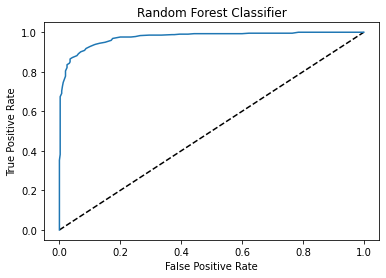

In [148]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [149]:
auc_score=roc_auc_score(y_test,best_model.predict(X_test))
print(auc_score)

0.9151871980676328


In [150]:
from sklearn import metrics

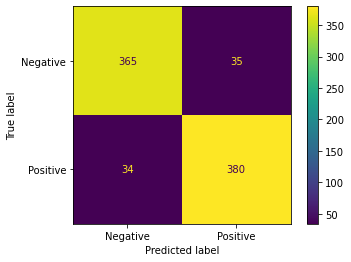

In [151]:
metrics.plot_confusion_matrix(best_modeRl, X_test, y_test, display_labels=['Negative', 'Positive'])

# Saving Model

In [154]:
import joblib
joblib.dump(RF,'HR_Analytics.obj')

['HR_Analytics.obj']